In [2]:
import pandas as pd

In [4]:
covid_data= pd.read_csv("/content/03-17-2020.csv")
print(covid_data)

       Province/State  Country/Region          Last Update  Confirmed  Deaths  \
0               Hubei           China  2020-03-17T11:53:10      67799    3111   
1                 NaN           Italy  2020-03-17T18:33:02      31506    2503   
2                 NaN            Iran  2020-03-17T15:13:09      16169     988   
3                 NaN           Spain  2020-03-17T20:53:02      11748     533   
4                 NaN         Germany  2020-03-17T18:53:02       9257      24   
..                ...             ...                  ...        ...     ...   
303           Unknown         Ukraine  2020-03-17T11:53:10          0       0   
304           England  United Kingdom  2020-03-17T11:53:10          0     198   
305  Northern Ireland  United Kingdom  2020-03-17T11:53:10          0       0   
306          Scotland  United Kingdom  2020-03-17T11:53:10          0      11   
307             Wales  United Kingdom  2020-03-17T11:53:10          0       5   

     Recovered  Latitude  L

In [ ]:
print("\nDataset information:")
print(covid_data.info())
print("\nMissing data information:")
print(covid_data.isna().sum())


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  152 non-null    object 
 1   Country/Region  308 non-null    object 
 2   Last Update     308 non-null    object 
 3   Confirmed       308 non-null    int64  
 4   Deaths          308 non-null    int64  
 5   Recovered       308 non-null    int64  
 6   Latitude        305 non-null    float64
 7   Longitude       305 non-null    float64
dtypes: float64(2), int64(3), object(3)
memory usage: 19.4+ KB
None

Missing data information:
Province/State    156
Country/Region      0
Last Update         0
Confirmed           0
Deaths              0
Recovered           0
Latitude            3
Longitude           3
dtype: int64


2. Write a Python program to get the latest number of confirmed, deaths, recovered and active cases of Novel Coronavirus (COVID-19) Country wise.

In [ ]:
covid_data['Active'] = covid_data['Confirmed'] - covid_data['Deaths'] - covid_data['Recovered']
result = covid_data.groupby('Country/Region')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
print(result) 


                     Country/Region  Confirmed  Deaths  Recovered  Active
0                       Afghanistan         26       0          1      25
1                           Albania         55       1          0      54
2                           Algeria         60       4         12      44
3                           Andorra         39       0          1      38
4                        Antarctica          0       0          0       0
..                              ...        ...     ...        ...     ...
161                      Uzbekistan         10       0          0      10
162                       Venezuela         33       0          0      33
163                         Vietnam         66       0         16      50
164            Winter Olympics 2022          0       0          0       0
165  occupied Palestinian territory          0       0          0       0

[166 rows x 5 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


3. Write a Python program to get the latest number of confirmed deaths and recovered people of Novel Coronavirus (COVID-19) cases Country/Region - Province/State wise




In [ ]:
data = covid_data.groupby(['Country/Region', 'Province/State'])['Confirmed', 'Deaths', 'Recovered'].max()
print(data)

                                             Confirmed  Deaths  Recovered
Country/Region Province/State                                            
Australia      Australian Capital Territory          2       0          0
               From Diamond Princess                 0       0          0
               New South Wales                     210       4          4
               Northern Territory                    1       0          0
               Queensland                           78       0          8
               South Australia                      29       0          3
               Tasmania                              7       0          0
               Victoria                             94       0          8
               Western Australia                    31       1          0
Canada         Alberta                              74       0          0
               British Columbia                    103       4          4
               Grand Princess         

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


4. Write a Python program to get the Chinese province wise cases of confirmed, deaths and recovered cases of Novel Coronavirus (COVID-19). 

In [ ]:
data = covid_data[covid_data['Country/Region']=='China']
data[['Confirmed', 'Deaths', 'Recovered']]
result = data.sort_values(by='Confirmed', ascending=False)
#result = result.reset_index(drop=True)

print(result)

     Province/State Country/Region          Last Update  Confirmed  Deaths  \
0             Hubei          China  2020-03-17T11:53:10      67799    3111   
12        Guangdong          China  2020-03-17T01:53:03       1364       8   
14            Henan          China  2020-03-14T09:53:08       1273      22   
16         Zhejiang          China  2020-03-17T02:13:21       1232       1   
19            Hunan          China  2020-03-14T08:33:03       1018       4   
20            Anhui          China  2020-03-11T02:18:14        990       6   
22          Jiangxi          China  2020-03-12T02:13:04        935       1   
24         Shandong          China  2020-03-17T00:33:02        761       7   
27          Jiangsu          China  2020-03-15T01:53:02        631       0   
28        Chongqing          China  2020-03-15T03:53:04        576       6   
29          Sichuan          China  2020-03-17T08:33:02        540       3   
30     Heilongjiang          China  2020-03-17T01:33:02        4

5. Write a Python program to get the latest country wise deaths cases of Novel Coronavirus (COVID-19).

In [ ]:
#data = covid_data.groupby('Country/Region')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
result = data[data['Deaths']>0][['Country/Region', 'Deaths']]
print(result) 

         Country/Region  Deaths
1               Albania       1
2               Algeria       4
6             Argentina       2
9             Australia       5
10              Austria       3
11           Azerbaijan       1
12              Bahrain       1
16              Belgium      10
21               Brazil       1
23             Bulgaria       2
27               Canada       6
30                China    3230
37          Cruise Ship       7
41              Denmark       4
42   Dominican Republic       1
43              Ecuador       2
44                Egypt       4
49              Finland       4
50               France     148
54              Germany      24
56               Greece       5
60            Guatemala       1
63               Guyana       1
66              Hungary       1
67              Iceland       1
68                India       3
69            Indonesia       5
70                 Iran     988
71                 Iraq      11
72              Ireland       2
74      

6. Write a Python program to list countries with no cases of Novel Coronavirus (COVID-19) recovered. 

In [ ]:
result = data[data['Recovered']==0][['Country/Region', 'Recovered']]
print(result) 

                       Country/Region  Recovered
1                             Albania          0
4                          Antarctica          0
5                 Antigua and Barbuda          0
8                               Aruba          0
14                           Barbados          0
17                              Benin          0
18                             Bhutan          0
19                            Bolivia          0
22                             Brunei          0
23                           Bulgaria          0
24                       Burkina Faso          0
26                           Cameroon          0
28           Central African Republic          0
29                              Chile          0
32                Congo (Brazzaville)          0
33                   Congo (Kinshasa)          0
34                         Costa Rica          0
38                               Cuba          0
39                             Cyprus          0
42                 D

7. Write a Python program to list countries with all cases of Novel Coronavirus (COVID-19) died.

In [ ]:
#data = covid_data.groupby('Country/Region')['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()
result = data[data['Confirmed']==data['Deaths']]
result = result[['Country/Region', 'Confirmed', 'Deaths']]
#result = result.sort_values('Confirmed', ascending=False)
result = result[result['Confirmed']>0]
#result = result.reset_index(drop=True)
print(result)


    Country/Region  Confirmed  Deaths
141          Sudan          1       1


8. Write a Python program to list countries with all cases of Novel Coronavirus (COVID-19) recovered.

In [ ]:
result = data[data['Confirmed']==data['Recovered']]
result = result[['Country/Region', 'Confirmed', 'Recovered']]
result = result[result['Confirmed']>0]
print(result)


    Country/Region  Confirmed  Recovered
105          Nepal          1          1


9. Write a Python program to get the top 10 countries data (Last Update, Country/Region, Confirmed, Deaths, Recovered) of Novel Coronavirus (COVID-19).

In [ ]:
result = covid_data.groupby('Country/Region').max().sort_values(by='Confirmed', ascending=False)[:10]
print(result)

                        Last Update  Confirmed  Deaths  Recovered  Latitude  \
Country/Region                                                                
China           2020-03-17T12:13:13      67799    3111      56003   47.8620   
Italy           2020-03-17T18:33:02      31506    2503       2941   41.8719   
Iran            2020-03-17T15:13:09      16169     988       5389   32.4279   
Spain           2020-03-17T20:53:02      11748     533       1028   40.4637   
Germany         2020-03-17T18:53:02       9257      24         67   51.1657   
Korea, South    2020-03-17T10:33:03       8320      81       1407   35.9078   
France          2020-03-17T19:13:08       7652     148         12   46.2276   
Switzerland     2020-03-17T16:33:04       2700      40          4   46.8182   
United Kingdom  2020-03-17T15:13:09       1950     198         52   56.4907   
US              2020-03-17T23:53:03       1706      55          6   61.3707   

                Longitude  Active  
Country/Region 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  """Entry point for launching an IPython kernel.


10. Write a Python program to create a plot (lines) of total deaths, confirmed, recovered and active cases Country wise where deaths greater than 150.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
data = data.sort_values(by='Deaths', ascending=False)
r_data = data[data['Deaths']>150]
print(r_data)

     Country/Region  Confirmed  Deaths  Recovered
30            China      81058    3230      68798
74            Italy      31506    2503       2941
70             Iran      16169     988       5389
139           Spain      11748     533       1028
159  United Kingdom       1954     215         53


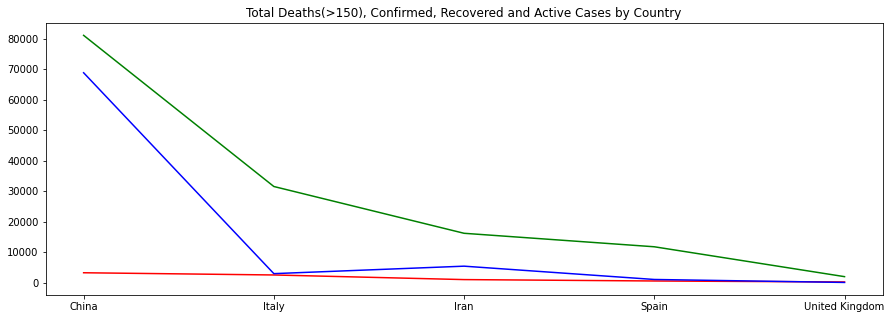

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(r_data['Country/Region'], r_data['Deaths'],color='red')
plt.plot(r_data['Country/Region'], r_data['Confirmed'],color='green')
plt.plot(r_data['Country/Region'], r_data['Recovered'], color='blue')
#plt.plot(r_data['Country/Region'], r_data['Active'], color='black')
 
plt.title('Total Deaths(>150), Confirmed, Recovered and Active Cases by Country')
plt.show()

In [8]:
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"
 

In [9]:
grouped = covid_data.groupby('Last Update')['Last Update', 'Confirmed', 'Deaths'].sum().reset_index()
fig = px.line(grouped, x="Last Update", y="Confirmed",
             title="Worldwide Confirmed Novel Coronavirus(COVID-19) Cases Over Time")
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.
